# 21강 워드 임베딩 (2) Word2Vec 실습 2회차: 임베딩 모델 탐색

2025-12-03

## 0. 환경 설정

In [1]:
# 필요한 라이브러리 설치
# %pip install datasets scikit-learn pandas numpy matplotlib seaborn
# %pip install gensim

In [2]:
# 한글 폰트 파일 다운로드
# !mkdir -p ../fonts
# !wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip -O ../fonts/NotoSansCJKkr-hinted.zip
# !unzip ../fonts/NotoSansCJKkr-hinted.zip -d ../fonts
# !rm ../fonts/NotoSansCJKkr-hinted.zip

In [ ]:
# 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec, FastText
from sklearn.manifold import TSNE

# 한글 폰트 설정
import matplotlib.font_manager as fm

# 한글 폰트 설정 (matplotlib)
font_dir = ['../fonts']
for font in fm.findSystemFonts(font_dir):
    fm.fontManager.addfont(font)

plt.rcParams['font.family'] = 'Noto Sans CJK KR'
plt.rcParams['axes.unicode_minus'] = False

sns.set_theme(font='Noto Sans CJK KR')

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

print("라이브러리 로드 완료!")

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


라이브러리 로드 완료!


## 1. 임베딩 모델 로드

In [5]:
algorithms = ('CBOW', 'SG')
models = {'Word2Vec': {}, 'FastText': {}}

for class_ in models:
    for algorithm in algorithms:
        print(f'{class_} {algorithm} 모델 로드...')
        model_path = f'../models/nsmc_{class_.lower()}_{algorithm.lower()}.model'
        models[class_][algorithm] = eval(class_).load(model_path)

Word2Vec CBOW 모델 로드...
Word2Vec SG 모델 로드...
FastText CBOW 모델 로드...
FastText SG 모델 로드...


## 2. 임베딩 모델 탐색

### 2.1. 의미가 비슷한 단어 찾기

In [6]:
def print_neighbors(query):
    for class_ in models:
        for algorithm in models[class_]:
            print(class_, algorithm, models[class_][algorithm].wv.most_similar(query))

In [7]:
print_neighbors('최고')

Word2Vec CBOW [('최강', 0.6906596422195435), ('최고다', 0.6719499826431274), ('최고봉', 0.6652553677558899), ('레전드', 0.6516189575195312), ('으뜸', 0.633491575717926), ('쵝오', 0.6167448163032532), ('명품', 0.5920023322105408), ('단연', 0.5870621204376221), ('진수', 0.5833919644355774), ('완벽한', 0.5830956697463989)]
Word2Vec SG [('쵝오', 0.7560613751411438), ('최고다', 0.7384321093559265), ('단연', 0.7381218671798706), ('최고봉', 0.7286595702171326), ('최강', 0.7187907695770264), ('손꼽히는', 0.71510910987854), ('레전드', 0.699718177318573), ('곱니다', 0.6987866163253784), ('으뜸', 0.6973884701728821), ('꼽는', 0.6826701760292053)]
FastText CBOW [('최고점', 0.9711028933525085), ('최고급', 0.9371392726898193), ('최고봉', 0.8949205279350281), ('최고다', 0.802104651927948), ('최강', 0.716951310634613), ('레전드', 0.657646119594574), ('멋진날', 0.644596517086029), ('최악', 0.6361337900161743), ('으뜸', 0.6333293318748474), ('쵝오', 0.6195334792137146)]
FastText SG [('쵝오', 0.7502449154853821), ('최고봉', 0.7399648427963257), ('단연', 0.7365654110908508), ('최강', 0.72

In [8]:
print_neighbors('최악')

Word2Vec CBOW [('졸작', 0.6579559445381165), ('최대', 0.6190850734710693), ('으뜸', 0.6150304079055786), ('최고봉', 0.6071114540100098), ('망작', 0.5773770809173584), ('최강', 0.5762460827827454), ('최고', 0.5616255402565002), ('지름길', 0.5569623708724976), ('갑', 0.5568093657493591), ('개망작', 0.5395625233650208)]
Word2Vec SG [('워스트', 0.71303790807724), ('최대', 0.6912505030632019), ('가본', 0.6909786462783813), ('으뜸', 0.6909511685371399), ('개망작', 0.6728001236915588), ('넘버원', 0.6672294735908508), ('이제껏', 0.6621455550193787), ('베스트', 0.66131991147995), ('손꼽히는', 0.6608519554138184), ('5위안', 0.6569833159446716)]
FastText CBOW [('최고봉', 0.7012004256248474), ('졸작', 0.6798494458198547), ('최고점', 0.6735426187515259), ('으뜸', 0.6675048470497131), ('최고급', 0.6510863304138184), ('최대', 0.6399661898612976), ('최고', 0.6361337900161743), ('망작', 0.626223623752594), ('최강', 0.6091147065162659), ('개망작', 0.6021810173988342)]
FastText SG [('개망작', 0.7062023282051086), ('최대', 0.6976442933082581), ('으뜸', 0.6887051463127136), ('가본', 0.6

In [9]:
print_neighbors('재미')

Word2Vec CBOW [('어이', 0.6411495804786682), ('볼거리', 0.6288780570030212), ('흥미', 0.619590163230896), ('감흥', 0.6125258207321167), ('임팩트', 0.6108185648918152), ('포인트', 0.6076902747154236), ('잼', 0.5997403860092163), ('스릴', 0.5900476574897766), ('의미', 0.5739300847053528), ('짜임새', 0.556608259677887)]
Word2Vec SG [('잼', 0.6733351945877075), ('볼거리', 0.6456616520881653), ('흥미', 0.6399657726287842), ('남는거', 0.5955386161804199), ('할말도', 0.5900114178657532), ('임팩트', 0.5898993611335754), ('남는것도', 0.5898112058639526), ('긴장도', 0.5876086950302124), ('없슴', 0.5858611464500427), ('신선함도', 0.5851312875747681)]
FastText CBOW [('잔재미', 0.9233831763267517), ('재미나', 0.6949697136878967), ('재미없을수가', 0.6876932978630066), ('재미있지도', 0.6623608469963074), ('재미없지', 0.6598347425460815), ('어이', 0.6561577320098877), ('재미없는것도', 0.6554819345474243), ('재미있지', 0.6533554196357727), ('재미없냐', 0.6517311930656433), ('재미없이', 0.651157021522522)]
FastText SG [('잼', 0.7003246545791626), ('볼거리', 0.6533268094062805), ('참신함', 0.639707922

In [10]:
print_neighbors('재밌다')

Word2Vec CBOW [('재미있다', 0.8884080052375793), ('재밌음', 0.8877174258232117), ('재미있음', 0.839157223701477), ('재밌었어요', 0.8278554081916809), ('재밌네요', 0.8188347816467285), ('재밌었다', 0.8139083385467529), ('재미있네요', 0.8104941248893738), ('잼있음', 0.8079246878623962), ('잼있다', 0.803433895111084), ('재미있었어요', 0.7829427123069763)]
Word2Vec SG [('재미있다', 0.8450695872306824), ('잼있다', 0.8081316947937012), ('재미있음', 0.8064969182014465), ('재밌음', 0.8052060008049011), ('재밋다', 0.7964281439781189), ('잼있음', 0.7865279912948608), ('재밌네요', 0.7826167941093445), ('유쾌하다', 0.773811399936676), ('재밋음', 0.7736291289329529), ('재미있네요', 0.7704125642776489)]
FastText CBOW [('재밌음', 0.9463641047477722), ('재밌군', 0.9403136372566223), ('재밌슴', 0.9393303394317627), ('재밌죠', 0.9381874799728394), ('재밌네용', 0.9359861016273499), ('재밌네', 0.9354162216186523), ('재밌내요', 0.935015857219696), ('재밌당', 0.9347712993621826), ('재밌던', 0.9328832030296326), ('재밌구', 0.9327884912490845)]
FastText SG [('재밌죠', 0.8785262703895569), ('재밌슴', 0.8692171573638916), (

### 2.2. 단어 벡터 시각화

In [11]:
pos_words = ['최고', '명작', '수작', '감동', '여운', '꿀잼']
neg_words = ['최악', '망작', '졸작', '쓰레기', '실망', '노잼']

In [12]:
model = models['Word2Vec']['SG']

word_matrix = model.wv[pos_words + neg_words]

tsne = TSNE(n_components=2, perplexity=3, random_state=1044)
df = pd.DataFrame(tsne.fit_transform(word_matrix), columns=('x', 'y'))
df['word'] = pos_words + neg_words
df['sentiment'] = ['Positive'] * len(pos_words) + ['Negative'] * len(neg_words)
df


,x,y,word,sentiment
0,37.973423,-30.076376,최고,Positive
1,27.248405,39.015736,명작,Positive
2,43.210796,28.766989,수작,Positive
3,44.798580,87.618340,감동,Positive
4,58.271912,101.145401,여운,Positive
5,2.146526,52.992741,꿀잼,Positive
6,-3.063567,-47.547127,최악,Negative
7,-26.644760,-3.434272,망작,Negative
8,-34.724098,-19.287550,졸작,Negative
9,-28.667715,-46.957684,쓰레기,Negative


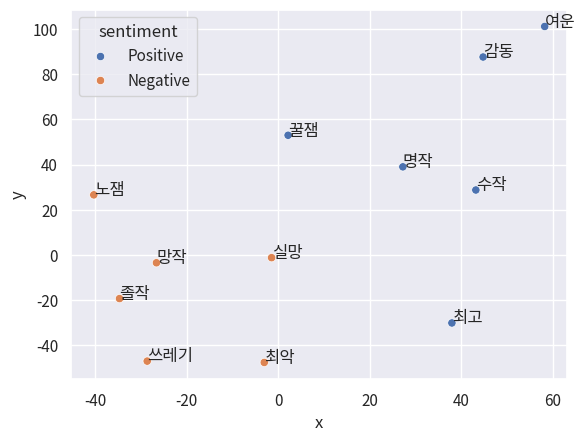

In [13]:
ax = sns.scatterplot(data=df, x='x', y='y', hue='sentiment')
for _, row in df.iterrows():
    ax.annotate(row['word'], (row['x'], row['y']))


In [14]:
def plot2d(ax, model, pos_words, neg_words, title):
    word_matrix = model.wv[pos_words + neg_words]

    tsne = TSNE(n_components=2, perplexity=3, random_state=1044)

    df = pd.DataFrame(tsne.fit_transform(word_matrix), columns=('x', 'y'))
    df['word'] = pos_words + neg_words
    df['sentiment'] = ['Positive'] * len(pos_words) + ['Negative'] * len(neg_words)

    sns.scatterplot(data=df, x='x', y='y', hue='sentiment', ax=ax, legend=False)
    for _, row in df.iterrows():
        ax.annotate(row['word'], (row['x'], row['y']))
    
    ax.set_title(title)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    # 외곽선 상자 추가
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1)
    ax.patch.set_visible(True)

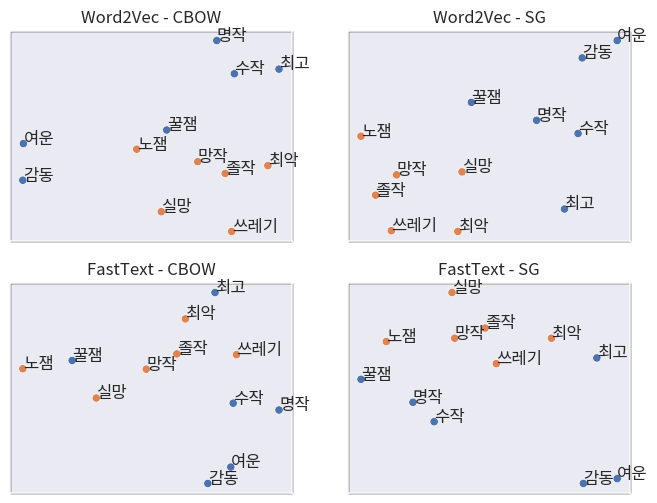

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

titles = [(class_, algorithm) for class_ in models for algorithm in models[class_]]

for ax, (class_, algorithm) in zip(axes.flatten(), titles):
    model = models[class_][algorithm]
    plot2d(ax, model, pos_words, neg_words, f'{class_} - {algorithm}')

### 2.3.평행사변형 모델

In [16]:
model = models['Word2Vec']['SG']

# 최고 : 최악 = 꿀잼 : 노잼
model.wv.most_similar(positive=['꿀잼', '최악'], negative=['최고'])

[('노잼', 0.6683760285377502),
 ('노답', 0.642069399356842),
 ('병맛', 0.6394709944725037),
 ('재미없어', 0.6374976634979248),
 ('렉', 0.6374428272247314),
 ('걸림', 0.6251924633979797),
 ('셈', 0.6234933733940125),
 ('빡침', 0.6229696273803711),
 ('발암', 0.6225703954696655),
 ('개망작', 0.6199228763580322)]